In [6]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Manju\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39hb82d6ee_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py39hb82d6ee_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




cond



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [8]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import wordcloud

%matplotlib inline

df = pd.read_csv('disney_plus_shows.csv')

In [9]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [10]:
df.head(5)


imdb_id                                       title  \
0  tt0147800                  10 Things I Hate About You   
1  tt7019028                        101 Dalmatian Street   
2  tt0115433                              101 Dalmatians   
3  tt0324941  101 Dalmatians 2: Patch's London Adventure   
4  tt0211181                              102 Dalmatians   

                                                plot    type  rated   year  \
0  A pretty, popular teenager can't go out on a d...   movie  PG-13   1999   
1  This series follows the lives of Delilah and D...  series    NaN  2018–   
2  An evil high-fashion designer plots to steal D...   movie      G   1996   
3  Being one of 101 takes its toll on Patch, who ...   movie      G   2002   
4  Cruella DeVil gets out of prison and goes afte...   movie      G   2000   

   released_at           added_at  runtime  \
0  31 Mar 1999  November 12, 2019   97 min   
1  25 Mar 2019  February 28, 2020      NaN   
2  27 Nov 1996  November 12, 2019  103 min   
3  21 Jan 2003  November 12, 2019   74 min   
4  22 Nov 2000  November 12, 2019  100 min   

                                           genre                   director  \
0                         Comedy, Drama, Romance                 Gil Junger   
1                      Animation, Comedy, Family                        NaN   
2               Adventure, Comedy, Crime, Family              Stephen Herek   
3  Animation, Adventure, Comedy, Family, Musical  Jim Kammerud, Brian Smith   
4                      Adventure, Comedy, Family                 Kevin Lima   

                                              writer  \
0                      Karen McCullah, Kirsten Smith   
1                                                NaN   
2      Dodie Smith (novel), John Hughes (screenplay)   
3  Jim Kammerud (story), Dan Root (story), Garret...   
4  Dodie Smith (novel), Kristen Buckley (story), ...   

                                              actors          language  \
0  Heath Ledger, Julia Stiles, Joseph Gordon-Levi...   English, French   
1  Josh Brener, Michaela Dietz, Bert Davis, Abiga...           English   
2  Glenn Close, Jeff Daniels, Joely Richardson, J...  English, Spanish   
3  Barry Bostwick, Jason Alexander, Martin Short,...           English   
4  Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...           English   

           country                                             awards  \
0              USA                           2 wins & 13 nominations.   
1  UK, USA, Canada                                                NaN   
2          USA, UK  Nominated for 1 Golden Globe. Another 3 wins &...   
3              USA                           5 wins & 10 nominations.   
4          USA, UK  Nominated for 1 Oscar. Another 1 win & 7 nomin...   

   metascore  imdb_rating imdb_votes  
0       70.0          7.3    283,945  
1        NaN          6.2        124  
2       49.0          5.7     97,785  
3        NaN          5.8      7,434  
4       35.0          4.9     33,444

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

In [12]:
df.describe()

metascore  imdb_rating
count  292.000000   879.000000
mean    62.061644     6.656428
std     15.776455     1.020352
min     19.000000     1.500000
25%     51.000000     6.100000
50%     61.000000     6.700000
75%     73.000000     7.400000
max     99.000000     9.700000

## Exploratory Data Analysis

### IMBD Ratings

In [13]:
fig = px.histogram(df['imdb_rating'],nbins=40,labels={'value':'imbd_rating'})
fig.update_layout(title='Distribution of IMBD Ratings',title_x=0.5)

In [14]:
fig = px.box(df,y='imdb_rating')
fig.update_layout(title='Box Plot of IMBD Ratings',title_x=0.5)

In [15]:
df_top10 = df.sort_values('imdb_rating',ascending=False).head(10)
fig = go.Figure(data=[go.Bar(
            x=df_top10['title'], y=df_top10['imdb_rating'],
            text=df_top10['imdb_rating'],
            textposition='auto',
        )])
fig.update_layout(title='Top 10 shows/movies/episodes with the Highest IMDB Ratings',title_x=0.5)

In [16]:
top10_m = df[df['type'] == 'movie'].sort_values('imdb_rating',ascending=False).head(10)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 10 Movies with highest IMDB Rating',title_x=0.5)
fig.show()

In [17]:
fig = go.Figure(data=[go.Scatter(
    x=top10_m['title'],
    y=top10_m['imdb_rating'],
    mode='markers',
    marker=dict(
        color=10+np.random.randn(200),

        size=top10_m['imdb_rating']*5,
        showscale=True
        )
)])
fig.update_layout(
    title='Top 10 Movies with the Highest IMDB Ratings',
    title_x=0.5,
    xaxis_title="name",
    yaxis_title="IMDB Rating",
        template='plotly_white'

)
fig.show()

In [18]:
top10_m = df[df['type'] == 'series'].sort_values('imdb_rating',ascending=False).head(10)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 10 Series with highest IMDB Rating',title_x=0.5)
fig.show()

In [19]:
fig = go.Figure(data=[go.Scatter(
    x=top10_m['title'],
    y=top10_m['imdb_rating'],
    mode='markers',
    marker=dict(
        color=10+np.random.randn(200),

        size=top10_m['imdb_rating']*5,
        showscale=True
        )
)])
fig.update_layout(
    title='Top 10 Series with the Highest IMDB Ratings',
    title_x=0.5,
    xaxis_title="name",
    yaxis_title="IMDB Rating",
        template='plotly_white'

)
fig.show()

In [20]:
top10_m = df[df['type'] == 'episode'].sort_values('imdb_rating',ascending=False).head(10)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 10 Episodes with highest IMDB Rating',title_x=0.5)
fig.show()

In [21]:
fig = go.Figure(data=[go.Scatter(
    x=top10_m['title'],
    y=top10_m['imdb_rating'],
    mode='markers',
    marker=dict(
        color=10+np.random.randn(200),

        size=top10_m['imdb_rating']*5,
        showscale=True
        )
)])
fig.update_layout(
    title='Top 10 Episodes with the Highest IMDB Ratings',
    title_x=0.5,
    xaxis_title="name",
    yaxis_title="IMDB Rating",
        template='plotly_white'

)
fig.show()

In [22]:
fig = px.histogram(df['imdb_votes'])
fig.update_layout(title='Distribution of IMBD Votes',title_x=0.5)

In [23]:
df_top10_v = df.sort_values('imdb_votes',ascending=False).head(10)
df_top10_v['imdb_votes'] = df_top10_v['imdb_votes'].apply(lambda x: x.replace(',','.')).astype(float)

fig = go.Figure(data=[go.Bar(
            x=df_top10_v['title'], y=df_top10_v['imdb_votes'],
            text=df_top10_v['imdb_votes'],
            textposition='auto',
        )])

fig.update_layout(title='Top 10 shows/movies/episodes with the most IMDB Votes',title_x=0.5)
fig.show()

In [24]:
fig = go.Figure(data=[go.Bar(
            x=df_top10_v['genre'], y=df_top10_v['imdb_votes'],
            text=round(df_top10_v['imdb_votes'],0),
            textposition='auto',
        )])

fig.update_layout(title='Top 10 Genres with the most IMDB Votes',title_x=0.5)
fig.show()

In [25]:
top10_m = df[df['type'] == 'movie'].sort_values('imdb_votes',ascending=False).head(10)
top10_m['imdb_votes'] = top10_m['imdb_votes'].apply(lambda x: x.replace(',','.')).astype(float)


fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_votes'],text=top10_m['imdb_votes'])
fig.update_layout(title='Top 10 Movies with highest IMDB Votes',title_x=0.5)
fig.show()

In [31]:
top10_m = df[df['type'] == 'series'].sort_values('imdb_votes',ascending=False).head(10)
top10_m['imdb_votes'] = top10_m['imdb_votes'].apply(lambda x: x.replace(',','.')).astype(float)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 10 Series with highest IMDB Votes',title_x=0.5)
fig.show()

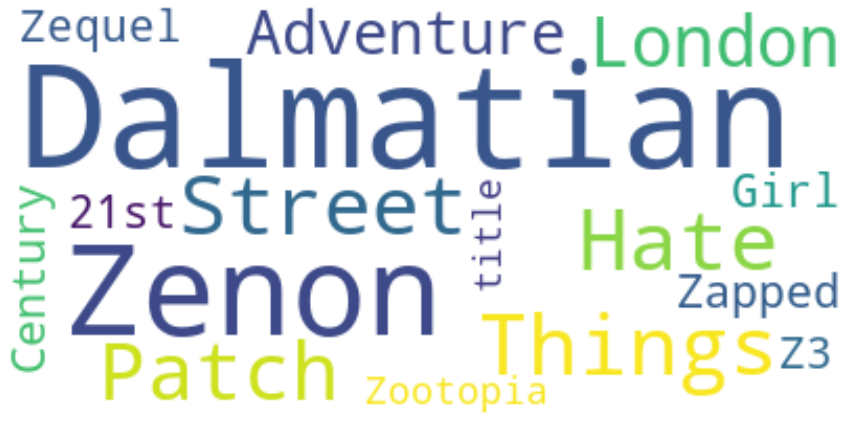

In [28]:
stopwords = ['dtype','Name','object','Length'] + list(STOPWORDS)


genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['title']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
top10_m = df[df['type'] == 'episode'].sort_values('imdb_votes',ascending=False).head(10)
top10_m['imdb_votes'] = top10_m['imdb_votes'].apply(lambda x: x.replace(',','.')).astype(float)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 10 Episodes with highest IMDB Votes',title_x=0.5)
fig.show()

# Title,Plot,Actors & Directors

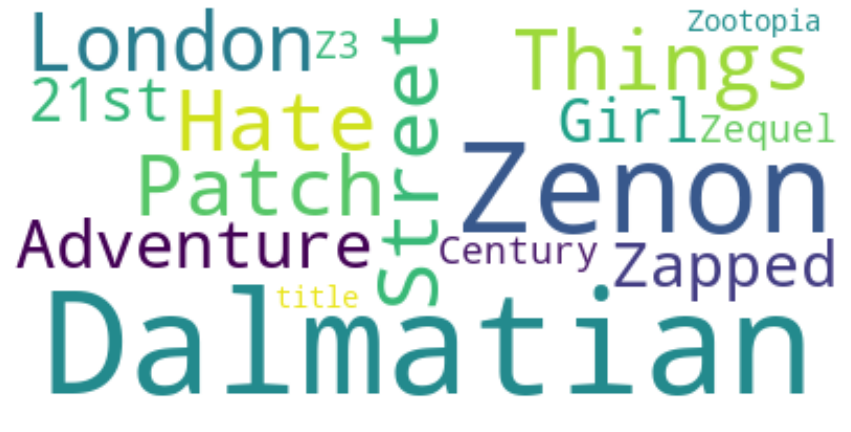

In [32]:
stopwords = ['dtype','Name','object','Length'] + list(STOPWORDS)


genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['title']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud of the most frequent words in the Titles

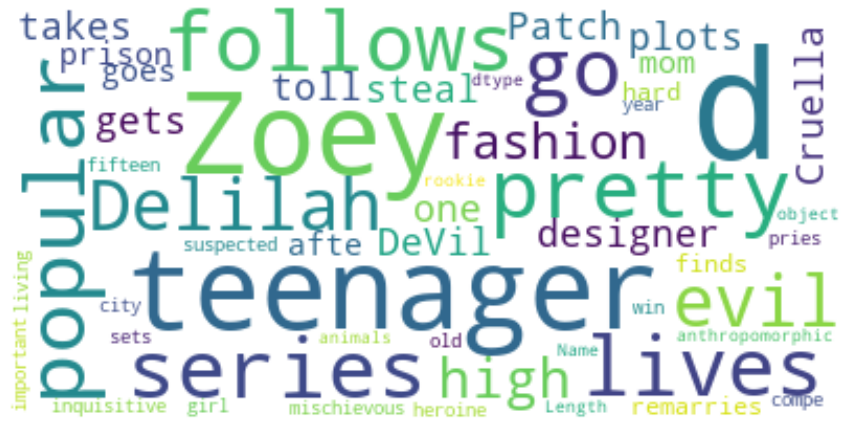

In [33]:
stopwords = ['plot','an','In'] + list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['plot']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud of the most frequent actor names

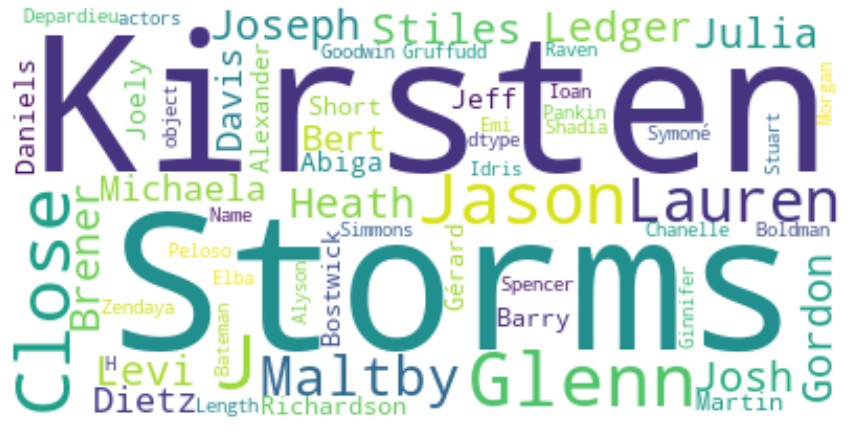

In [34]:
stopwords = set(STOPWORDS)

genre = wordcloud.WordCloud(stopwords=stopwords,background_color='white')

genre.generate(str(df['actors']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
df_writer = df.assign(var1 = df.writer.str.split(',')).explode('var1').reset_index(drop = True)

df_writer['splitted'] = df_writer.var1.str.lstrip()

In [36]:
writers = pd.DataFrame(df_writer['splitted'].value_counts()).reset_index().head(10)

fig = px.bar(writers,writers['index'],writers['splitted'],labels={'index':'name','splitted':'count'})
fig.update_layout(title='Top 10 Writers',title_x=0.5)

# WordCloud of the most frequent Director names

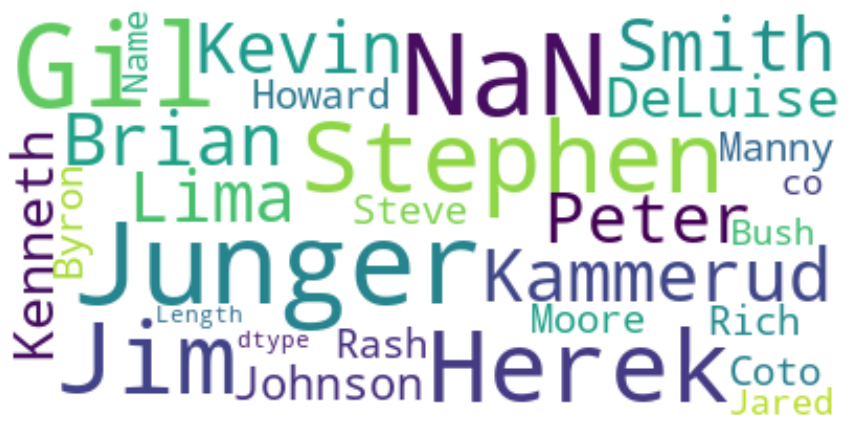

In [40]:
stopwords = ['object','director'] + list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['director']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df_director = df.assign(var1 = df.director.str.split(',')).explode('var1').reset_index(drop = True)

df_director['splitted'] = df_director.var1.str.lstrip()

directors = pd.DataFrame(df_director['splitted'].value_counts()).reset_index().head(10)

fig = px.bar(directors,directors['index'],directors['splitted'],labels={'index':'name','splitted':'count'})
fig.update_layout(title='Top 10 Directors',title_x=0.5)

# Genres

## WordCloud of the Genres

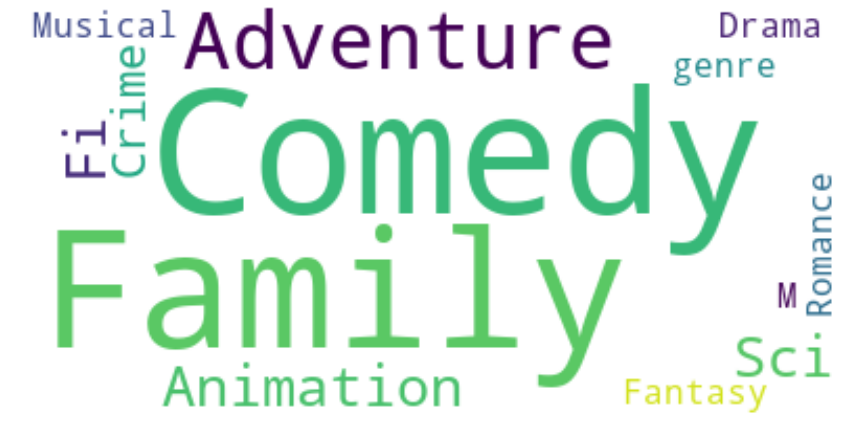

In [37]:
stop_words = ['dtype','Name','object','Length'] + list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stop_words,background_color='white')

genre.generate(str(df['genre']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
df_genres = df.groupby('genre')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)

In [44]:
df_genre = df.assign(var1 = df.genre.str.split(',')).explode('var1').reset_index(drop = True)

df_genre['splitted'] = df_genre.var1.str.lstrip()

genres = pd.DataFrame(df_genre['splitted'].value_counts()).reset_index().head(10)

fig = px.bar(genres,genres['index'],directors['splitted'],labels={'index':'name','splitted':'count'})
fig.update_layout(title='Top 10 Genres',title_x=0.5)

In [45]:
fig = go.Figure(data=[go.Bar(
            x=df_genres['genre'], y=df_genres['imdb_rating'],
            text=df_genres['imdb_rating'],
            textposition='auto',
        )])

fig.update_layout(title='Sum of IMBD Ratings per Genre',title_x=0.5)
fig.show()

In [46]:
fig = go.Figure(data=[go.Bar(
            x=df_genres['genre'].head(10), y=df_genres['imdb_rating'].head(10),
            text=round(df_genres['imdb_rating'].head(10),2),
            textposition='auto',
        )])

fig.update_layout(title='Top 10 Genres with the highest sum of IMDB ratings',title_x=0.5)
fig.show()

In [47]:
df_genres_m = df.groupby('genre')[['metascore']].sum().reset_index().sort_values('metascore',ascending=False)

In [48]:
fig = go.Figure(data=[go.Bar(
            x=df_genres_m['genre'], y=df_genres_m['metascore'],
            text=df_genres_m['metascore'],
            textposition='auto',
        )])

fig.update_layout(title='Sum of Metascore Ratings per Genre',title_x=0.5)
fig.show()

In [49]:
fig = go.Figure(data=[go.Bar(
            x=df_genres_m['genre'].head(10), y=df_genres_m['metascore'].head(10),
            text=round(df_genres_m['metascore'].head(10),2),
            textposition='auto',
        )])

fig.update_layout(title='Top 10 Genres with the highest sum of Metascore ratings',title_x=0.5)
fig.show()

In [50]:
fig = px.histogram(df['year'],labels={'value':'year'})
fig.update_layout(title='Distribution of show years',title_x=0.5)

In [51]:
df_years = df.groupby('year')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)

In [52]:
fig = px.bar(df_years,x=df_years['year'],y=df_years['imdb_rating'])
fig.update_layout(title='Sum of Imdb ratings per year',title_x=0.5)

In [53]:
fig = px.pie(df_years.head(10),names=df_years['year'].head(10),values=df_years['imdb_rating'].head(10),labels=df_years['year'],hole=0.5)
fig.update_traces(textposition='inside',name='year+label')

fig.update_layout(title='Top 10 years with the highest Cumulative IMDB ratings',title_x=0.5)

In [54]:
df_years_m = df.groupby('year')[['metascore']].sum().reset_index().sort_values('metascore',ascending=False)

In [55]:
fig = px.bar(df_years_m,x=df_years['year'],y=df_years_m['metascore'])
fig.update_layout(title='Sum of Metascore ratings per year',title_x=0.5)

In [56]:
fig = px.pie(df_years_m.head(10),names=df_years_m['year'].head(10),values=df_years_m['metascore'].head(10),labels=df_years_m['year'],hole=0.5)
fig.update_traces(textposition='inside',name='year+label')

fig.update_layout(title='Top 10 years with the highest Cumulative Metascore ratings',title_x=0.5)

# Runtime

In [57]:
fig = px.box(df,y='runtime')
fig.update_layout(title='Box Plot of Runtimes',title_x=0.5)

In [58]:
fig = px.histogram(df['runtime'])
fig.update_layout(title='Distribution of movie/show runtimes',title_x=0.5)

In [59]:
df_runtime_top10 = df.sort_values('runtime',ascending=False).head(10)
df_runtime_top10['runtime'] = df_runtime_top10['runtime'].apply(lambda x:x.replace('min','')).astype(int)

fig = px.bar(df_runtime_top10,x=df_runtime_top10['title'],y=df_runtime_top10['runtime'],text=df_runtime_top10['runtime'])
fig.update_layout(title='Top 10 movies/shows with the most runtimes',title_x=0.5)
fig.show()

In [60]:
df_runtime = df.groupby('runtime')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)

In [61]:
fig = px.bar(df_runtime,x=df_runtime['runtime'],y=df_runtime['imdb_rating'],text=df_runtime['imdb_rating'])
fig.update_layout(title='Cumulative IMDB Ratings grouped by runtimes',title_x=0.5)

fig.show()

In [62]:
fig = px.bar(df_runtime.head(10),x=df_runtime['runtime'].head(10),y=df_runtime['imdb_rating'].head(10),text=round(df_runtime['imdb_rating'],2).head(10))
fig.update_layout(title='Top 10 Runtimes with the highest sum of IMDB Ratings',title_x=0.5)

fig.show()

In [63]:
df_runtime_m = df.groupby('runtime')[['metascore']].sum().reset_index().sort_values('metascore',ascending=False)

In [64]:
fig = px.bar(df_runtime_m,x=df_runtime_m['runtime'],y=df_runtime_m['metascore'],text=df_runtime_m['metascore'])
fig.update_layout(title='Cumulative Metascore Ratings grouped by runtimes',title_x=0.5)

fig.show()

In [65]:
fig = px.bar(df_runtime_m.head(10),x=df_runtime_m['runtime'].head(10),y=df_runtime_m['metascore'].head(10),text=round(df_runtime_m['metascore'],2).head(10))
fig.update_layout(title='Top 10 Runtimes with the highest sum of Metascore Ratings',title_x=0.5)

fig.show()

# Metascore

In [66]:
fig = px.histogram(df['metascore'])
fig.update_layout(title='Metascore Distribution',title_x=0.5)

In [67]:
fig = px.box(df,y='metascore')
fig.update_layout(title='Box Plot of Metascore Ratings',title_x=0.5)

In [68]:
df_top10 = df.sort_values('metascore',ascending=False).head(10)
fig = go.Figure(data=[go.Bar(
            x=df_top10['title'], y=df_top10['metascore'],
            text=df_top10['imdb_rating'],
            textposition='auto',
        )])
fig.update_layout(title='Top 10 movies/shows/espisodes with the Highest Metascore Ratings',title_x=0.5)

In [69]:
fig = px.pie(df['metascore'],values=df['metascore'],names=df['genre'])
fig.update_traces(textposition='inside')
fig.update_layout(title='Number of Metascore Ratings by Genre',title_x=0.5)
fig.show()

# Languages

In [70]:
df_lang = df.assign(var1 = df.language.str.split(',')).explode('var1').reset_index(drop = True)

df_lang['splitted'] = df_lang.var1.str.lstrip()

lang = pd.DataFrame(df_lang['splitted'].value_counts()).reset_index().head(10)
lang.drop(df.index[5], inplace=True)

fig = px.bar(lang,lang['index'],lang['splitted'])
fig.update_layout(title='Top 10 Languages',title_x=0.5)


# Type

In [71]:
fig = px.histogram(df['type'])
fig.update_layout(title='Distribution of show types',title_x=0.5)

In [72]:
fig = px.histogram(df['type'])
fig.update_layout(title='Distribution of show types',title_x=0.5)

In [73]:
df_type = df.groupby('type')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)
fig = px.histogram(df_type,df_type['type'],df_type['imdb_rating'])
fig.update_layout(title='Sum of IMDB Ratings per show types',title_x=0.5)

In [74]:
fig = px.pie(df_type,names=df_type['type'],values=df_type['imdb_rating'],labels=df_type['type'],hole=0.5)
fig.update_layout(title='Sum of IMDB Ratings per show types',title_x=0.5)

In [75]:
fig = px.histogram(df['rated'])
fig.update_layout(title='Distribution of age ratings',title_x=0.5)

In [76]:
df_r = df.groupby('rated')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)

In [77]:
fig = px.histogram(df_type,df_r['rated'],df_r['imdb_rating'])
fig.update_layout(title='Sum of IMDB Ratings per Age ratings',title_x=0.5)

In [78]:
fig = px.pie(df_r,names=df_r['rated'],values=df_r['imdb_rating'],labels=df_r['rated'],hole=0.5)
fig.update_traces(textposition='inside')
fig.update_layout(title='Sum of IMDB Ratings grouped by Age Ratings',title_x=0.5)

In [79]:
fig = px.treemap(df_r, path=['rated'], values=df_r['imdb_rating'], height=700,
                 title='Sum of IMDB Ratings grouped by Age Ratings', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(title_x=0.5)
fig.show()

C:\Users\Manju\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Date added at 

In [80]:
fig = px.histogram(df['added_at'])
fig.update_layout(title='Distribution of the added dates of the shows',title_x=0.5)

In [81]:
df_aa = df.groupby('added_at')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)

In [82]:
fig = px.bar(df_aa,df_aa['added_at'],df_aa['imdb_rating'])
fig.update_layout(title='Added_at dates with the highest sum of IMDB ratings',title_x=0.5)

In [83]:
fig = px.bar(df_aa.head(10),df_aa['added_at'].head(10),df_aa['imdb_rating'].head(10))
fig.update_layout(title='Top 10 added_at dates with the highest sum of IMDB ratings',title_x=0.5)

# Recommender Systems


## 1. Content based Recommender System based on movie plots

In [84]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [86]:
df['plot'] = df['plot'].fillna('')

In [87]:
tfidf = TfidfVectorizer()
plot_matrix = tfidf.fit_transform(df['plot'])

In [88]:
similarity_matrix = linear_kernel(plot_matrix,plot_matrix)

In [89]:
mapping = pd.Series(df.index,index=df.title)

In [90]:
def plot_content_recommender(m_name):
    m_index = mapping[m_name]
    similarity_score = list(enumerate(similarity_matrix[m_index]))
    similarity_score = sorted(similarity_score,key=lambda x:x[1],reverse=True)
    similarity_score = similarity_score[1:10]
    indices = [i[0] for i in similarity_score]
    return df.title.iloc[indices]

In [94]:
plot_content_recommender('Coco')

183                           Milo Murphy's Law
738                                   Tall Tale
268                               Fantasia 2000
45     Bambi and the Great Prince of the Forest
267                                    Fantasia
39                                Austin & Ally
327                            Great Migrations
273                                Finding Nemo
656                                  Robin Hood
Name: title, dtype: object

In [95]:
plot_content_recommender('Finding Nemo')

753    The Adventures of Bullwhip Griffin
278                                 Float
81                              Breaking2
554                Mr. Mouse Takes a Trip
221                  Diving with Dolphins
183                     Milo Murphy's Law
100                                Cars 3
618                Pluto's Christmas Tree
853             The Princess and the Frog
Name: title, dtype: object

In [96]:
plot_content_recommender('Cars 3')

98                                 Cars
99                               Cars 2
112                   Time Travel Mater
922                        Tom and Huck
109                  Rescue Squad Mater
102                         El Materdor
87     Bug Juice: My Adventures at Camp
113                         Tokyo Mater
830                        The Love Bug
Name: title, dtype: object

## 2. Content based Recommender System based on movie plot,actors,directors and genre

In [97]:
data = df[['title','plot','director','actors','imdb_rating','genre','plot']]
data['actors'] = data['actors'].str.split(',').fillna('')
data['genre_splitted'] = data['genre'].str.split(',').fillna('')
data['director'] = data['director'].fillna('')
data['plot'] = data['plot'].fillna('')

In [98]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [100]:
features = ['actors', 'genre', 'director']

for feature in features:
    data[feature] = data[feature].apply(clean_data)

In [101]:
data

title  \
0                    10 Things I Hate About You   
1                          101 Dalmatian Street   
2                                101 Dalmatians   
3    101 Dalmatians 2: Patch's London Adventure   
4                                102 Dalmatians   
..                                          ...   
987                                      Zapped   
988             Zenon: Girl of the 21st Century   
989                           Zenon: The Zequel   
990                                   Zenon: Z3   
991                                    Zootopia   

                                                  plot  \
0    A pretty, popular teenager can't go out on a d...   
1    This series follows the lives of Delilah and D...   
2    An evil high-fashion designer plots to steal D...   
3    Being one of 101 takes its toll on Patch, who ...   
4    Cruella DeVil gets out of prison and goes afte...   
..                                                 ...   
987  When Zoey's mom remarries, Zoey finds it hard ...   
988  An inquisitive teenager pries into suspected d...   
989  A mischievous fifteen-year-old girl living on ...   
990  The heroine sets out to win an important compe...   
991  In a city of anthropomorphic animals, a rookie...   

                                         director  \
0                                       giljunger   
1                                                   
2                                    stephenherek   
3                          jimkammerud,briansmith   
4                                       kevinlima   
..                                            ...   
987                                  peterdeluise   
988                                kennethjohnson   
989                                     mannycoto   
990                                     steverash   
991  byronhoward,richmoore,jaredbush(co-director)   

                                                actors  imdb_rating  \
0    [heathledger, juliastiles, josephgordon-levitt...          7.3   
1    [joshbrener, michaeladietz, bertdavis, abigail...          6.2   
2    [glennclose, jeffdaniels, joelyrichardson, joa...          5.7   
3    [barrybostwick, jasonalexander, martinshort, b...          5.8   
4    [glennclose, gérarddepardieu, ioangruffudd, al...          4.9   
..                                                 ...          ...   
987  [zendaya, chanellepeloso, spencerboldman, emil...          5.1   
988  [kirstenstorms, raven-symoné, stuartpankin, ho...          6.4   
989  [kirstenstorms, shadiasimmons, laurenmaltby, s...          5.9   
990  [kirstenstorms, laurenmaltby, alysonmorgan, st...          5.5   
991  [ginnifergoodwin, jasonbateman, idriselba, jen...          8.0   

                                               genre  \
0                               comedy,drama,romance   
1                            animation,comedy,family   
2                      adventure,comedy,crime,family   
3          animation,adventure,comedy,family,musical   
4                            adventure,comedy,family   
..                                               ...   
987                            comedy,family,fantasy   
988                   adventure,comedy,family,sci-fi   
989                   comedy,family,adventure,sci-fi   
990                   adventure,comedy,family,sci-fi   
991  animation,adventure,comedy,crime,family,mystery   

                                                  plot  \
0    A pretty, popular teenager can't go out on a d...   
1    This series follows the lives of Delilah and D...   
2    An evil high-fashion designer plots to steal D...   
3    Being one of 101 takes its toll on Patch, who ...   
4    Cruella DeVil gets out of prison and goes afte...   
..                                                 ...   
987  When Zoey's mom remarries, Zoey finds it hard ...   
988  An inquisitive teenager pries into suspected d...   
989  A mischievous fifteen-year-old girl living

In [102]:
def create_soup(x):
    return ' '.join(x['actors']) + ' ' + x['director'] + ' ' + ' '.join(x['genre'] + ' '.join(x['plot']))

In [104]:
data['soup'] = data.apply(create_soup, axis=1)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
count = CountVectorizer()
count_matrix = count.fit_transform(data['soup'])

In [107]:
sim_matrix = cosine_similarity(count_matrix,count_matrix)

In [108]:
data = data.reset_index()
mapping = pd.Series(data.index, index=data['title'])

In [109]:
def extended_recommender(m_name):
    m_index = mapping[m_name]
    similarity_score = list(enumerate(sim_matrix[m_index]))
    similarity_score = sorted(similarity_score,key=lambda x:x[1],reverse=True)
    similarity_score = similarity_score[1:10]
    indices = [i[0] for i in similarity_score]
    return data.title.iloc[indices]

In [110]:
extended_recommender('Coco')

550        Monsters, Inc.
924           Toy Story 2
102           El Materdor
109    Rescue Squad Mater
273          Finding Nemo
113           Tokyo Mater
547                 Moana
218        Monkey Kingdom
257              Elephant
Name: title, dtype: object

In [111]:
extended_recommender('Moana')

102           El Materdor
109    Rescue Squad Mater
113           Tokyo Mater
550        Monsters, Inc.
924           Toy Story 2
218        Monkey Kingdom
257              Elephant
76               Boundin'
213          African Cats
Name: title, dtype: object

In [112]:
extended_recommender('Toy Story')

925                           Toy Story 3
926                           Toy Story 4
927    Toy Story Toons: Hawaiian Vacation
929            Toy Story Toons: Small Fry
924                           Toy Story 2
646                           Red's Dream
216                            Chimpanzee
915                               Tin Toy
408                       Jungle 2 Jungle
Name: title, dtype: object